In [21]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [ ]:
 trainSize = int(len(rawArrayDatas[0]) * 0.7)
testSize = len(rawArrayDatas[0]) - trainSize

testY = rawArrayDatas[1][trainSize:]
    mockDs = rawArrayDatas[0][:trainSize]
    mockY = list(np.log(rawArrayDatas[1][:trainSize]))
    mockSales = list(zip(mockDs, mockY))
    mockPreprocessedData = pd.DataFrame(data=mockSales, columns=['ds', 'y'])
    LoggingManager.PrintLogMessage("LearningManager", "LearningModuleRunner", "traindata create success",
                                   DefineManager.LOG_LEVEL_INFO)

    ds = rawArrayDatas[0]
    y = list(np.log(rawArrayDatas[1]))
    sales = list(zip(ds, y))
    preprocessedData = pd.DataFrame(data=sales, columns=['ds', 'y'])
    LoggingManager.PrintLogMessage("LearningManager", "LearningModuleRunner", "realdata create success",
                                   DefineManager.LOG_LEVEL_INFO)

    mockModel = Prophet()
    mockModel.fit(mockPreprocessedData)
    mockFuture = mockModel.make_future_dataframe(periods=testSize)
    mockForecastProphetTable = mockModel.predict(mockFuture)
    LoggingManager.PrintLogMessage("LearningManager", "LearningModuleRunner", "mockforecast success",
                                   DefineManager.LOG_LEVEL_INFO)
    mockForecastDictionary['Bayseian'] = [np.exp(y) for y in mockForecastProphetTable['yhat'][-testSize:]]

    model = Prophet()
    model.fit(preprocessedData)
    future = model.make_future_dataframe(periods=forecastDay)
    forecastProphetTable = model.predict(future)
    LoggingManager.PrintLogMessage("LearningManager", "LearningModuleRunner", "realforecast success",
                                   DefineManager.LOG_LEVEL_INFO)
    realForecastDictionary['Bayseian'] = [np.exp(y) for y in forecastProphetTable['yhat'][-forecastDay:]]

In [36]:
rawArrayDatas=[['2016-01-01','2016-01-02','2016-01-03'],[40,50,60]]

In [37]:
ds=rawArrayDatas[0]
y=rawArrayDatas[1]

In [ ]:
#rawArrayData에서 ds와 y의 dataframe을 만든다.
df=pd.DataFrame(data=r)

In [39]:
zip?

In [40]:
sales=list(zip(ds,y))

In [48]:
df = pd.DataFrame(data = sales, columns=['ds', 'y'])
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2016-01-01,3.688879
1,2016-01-02,3.912023
2,2016-01-03,4.094345


In [47]:
np.log(16) #밑이 뭐인 log지?

2.7725887222397811

In [43]:
df=pd.read_csv('./data/397_replace0with1.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2016-01-01,3.526361
1,2016-01-02,3.713572
2,2016-01-03,3.988984
3,2016-01-04,3.713572
4,2016-01-05,3.555348


In [35]:
type(df['ds'][0]) #str형, float형

str

In [49]:
#값에 0이 있으면 log를 할 때 inf가 되므로 Initialization failed. 오류가 나니 주의할 것.
m = Prophet()
m.fit(df);

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


RuntimeError: Something went wrong after call_sampler.

In [25]:
future = m.make_future_dataframe(periods=2)
future.tail()

,ds
389,2017-01-24
390,2017-01-25
391,2017-01-26
392,2017-01-27
393,2017-01-28


In [26]:
forecast=m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
389,2017-01-24,3.849657,3.172550,4.473737
390,2017-01-25,3.882157,3.184542,4.554034
391,2017-01-26,3.802603,3.104247,4.522867
392,2017-01-27,3.826318,3.105687,4.497667
393,2017-01-28,3.836739,3.065444,4.573446


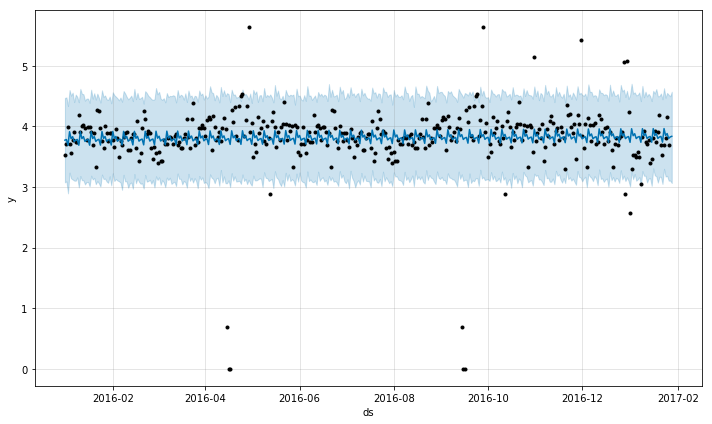

In [28]:
m.plot(forecast)

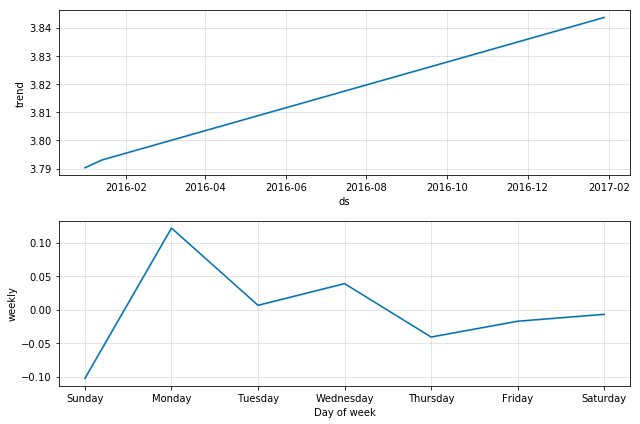

In [29]:
m.plot_components(forecast)